In [5]:
import numpy as np
import scipy.stats as stats
# import math
import gpflow
import matplotlib.pyplot as plt

### Step 1: GP Fit

In [17]:
X = np.array([[0.865], [0.666], [0.804], [0.771], [0.147], [0.866], [0.007], [0.026], [0.171], [0.889], [0.243], [0.028]])
Y = np.array([[1.57], [3.48], [3.12], [3.91], [3.07], [1.35], [3.80], [3.82], [3.49],[1.30], [4.00], [3.82]])
data = (X,Y)
# plt.plot(X, Y, "kx", mew=2)

def step1(data: tuple, kernel=gpflow.kernels.SquaredExponential()):
    """
    Fit GP to demand
    run once per product

    :param kernel: kernel for the GP
    :param data: (X,Y) where each element is in a list
    :return:
    """

    model = gpflow.models.GPR(data, kernel=kernel)
    opt = gpflow.optimizers.Scipy()
    opt.minimize(model.training_loss, model.trainable_variables)
    return model

model = step1(data)

In [20]:
### Plot model to check
Xplot = np.linspace(-0.1, 1.1, 100)[:, None]
f_mean, f_var = model.predict_f(Xplot, full_cov=False)
y_mean, y_var = model.predict_y(Xplot)
# confidence intervals
f_lower = f_mean - 1.96 * np.sqrt(f_var)
f_upper = f_mean + 1.96 * np.sqrt(f_var)
y_lower = y_mean - 1.96 * np.sqrt(y_var)
y_upper = y_mean + 1.96 * np.sqrt(y_var)

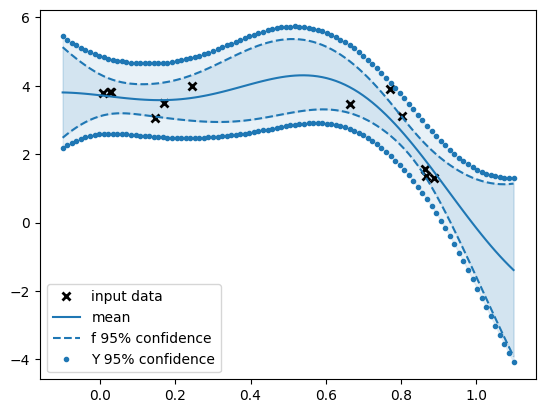

In [21]:
plt.plot(X, Y, "kx", mew=2, label="input data")
plt.plot(Xplot, f_mean, "-", color="C0", label="mean")
plt.plot(Xplot, f_lower, "--", color="C0", label="f 95% confidence")
plt.plot(Xplot, f_upper, "--", color="C0")
plt.fill_between(
    Xplot[:, 0], f_lower[:, 0], f_upper[:, 0], color="C0", alpha=0.1
)
plt.plot(Xplot, y_lower, ".", color="C0", label="Y 95% confidence")
plt.plot(Xplot, y_upper, ".", color="C0")
plt.fill_between(
    Xplot[:, 0], y_lower[:, 0], y_upper[:, 0], color="C0", alpha=0.1
)
plt.legend()